<a href="https://colab.research.google.com/github/mavito/ML_Concepts/blob/main/ML_IntroductionToLinearAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Foundational Linear Algebra for Machine Learning**

## **1. Matrices and Operations**

- ## Assignment Overview:
In this part, you will construct the fundamental data structures of linear algebra from scratch using NumPy. The goal is to move beyond calling "black box" functions and understand the dimensionality and structure of the data you are manipulating.

- ## Prerequisites:
Students should be familiar with basic Python syntax. We will use the *numpy* library, the standard for numerical computing in Python.

### **1.1: Defining Scalars, Vectors, and Matrices**

Before you begin the main task, review these examples. We define geometric objects using np.array. Note the difference in brackets `` which denotes the dimensions.

In [1]:
import numpy as np

In [2]:
# A SCALAR is a 0-D tensor (just a number)
scalar_val = 5
print(f"Scalar: {scalar_val}")

Scalar: 5


In [5]:
# A VECTOR is a 1-D tensor (an array of numbers)
# Represents a point in space or a direction.
vector_val = np.array([1,2,3])
print(f"Vector:\n{vector_val}")
print(f"Vector Shape: {vector_val.shape}") # Output: (3,)

Vector:
[1 2 3]
Vector Shape: (3,)


In [7]:
# A MATRIX is a 2-D tensor (an array of arrays)
# Represents a linear transformation or a dataset.
matrix_val = np.array([
                      [1,2,3],
                      [4,5,6],
                      [7,8,9]
                      ])

print(f"Matrix:\n{matrix_val}")
print(f"Matrix Shape: {matrix_val.shape}") # Output: (3, 3)

Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Matrix Shape: (3, 3)


### Task 1.1: System Representation:
You are given the following system of linear equations:
$$2x + 3y = 8$$
$$5x - y = -2$$

Construct the coefficient matrix $A$ and the constant vector $b$ using NumPy.

Print the shape of both to confirm they are correct ($2 \times 2$ and $2$, respectively).

In [ ]:
# TODO: Create Matrix A and Vector b corresponding to the system above.
# A should represent the coefficients [, [5, -1]]
# b should represent the constants [8, -2]

In [ ]:
A = None # REPLACE THIS with np.array(...)
b = None # REPLACE THIS with np.array(...)

# CHECK:
if A is not None and b is not None:
    print("Matrix A:\n", A)
    print("Vector b:\n", b)

### **2: Matrix Multiplication Logic**

Understanding the difference between matrix multiplication and element-wise multiplication is critical.

In neural networks, weights are applied via matrix multiplication, while activation functions often involve element-wise operations.

In [ ]:
# Define two 2x2 matrices
M1 = np.array([, ])
M2 = np.array([, ]) # This is the Identity Matrix

In [ ]:
# TYPE 1: Element-wise (Hadamard) Multiplication
# Multiplies corresponding elements: top-left with top-left, etc.
# Syntax: A * B
element_wise = M1 * M2
print(f"Element-wise Product:\n{element_wise}")
# Result: [, ]

In [ ]:
# TYPE 2: Matrix Multiplication (Dot Product)
# Rows of M1 dot Columns of M2. This is the geometric transformation.
# Syntax: A @ B  OR  np.dot(A, B)
dot_product = M1 @ M2
print(f"Dot Product:\n{dot_product}")
# Result: [, ] (Since M2 is identity, M1 is unchanged)

### Task 2.1: Implementation:
Create two $3 \times 3$ matrices, $X$ and $Y$,
with random integers between 1 and 10.
- Compute their dot product $Z = XY$.
- Compute their element-wise product $W = X \odot Y$.

Verify manually for the top-left element that the code is correct.

In [ ]:
# TODO: Initialize X and Y using np.random.randint or np.array
X = None
Y = None

# TODO: Perform Matrix Multiplication
Z = None

# TODO: Perform Element-wise Multiplication
W = None

print("Matrix Multiplication Result (Z):\n", Z)
print("Element-wise Result (W):\n", W)

## **3. Implementing Solvers**

- ## Assignment Overview:

In this module, you will implement the Gaussian Elimination algorithm from scratch. This exercise will expose you to the logic of loops, array indexing, and the potential pitfalls of division by zero.

### **3.1: Naive Gaussian Elimination**

We will implement the "Forward Elimination" phase to convert a matrix to Row Echelon Form.

In [ ]:
import numpy as np #If already imported above, no need to run this cell again

In [15]:
# Create an augmented matrix [A | b]
M = np.array([[2.0, 3.0, 8.0],
    [5.0, -1.0, -2.0]])

In [16]:
# Goal: Eliminate the '5.0' in position (1, 0) using the pivot '2.0' in (0, 0).
pivot = M
target = M

# Calculate the multiplier
factor = target / pivot  # 5 / 2 = 2.5

# Update Row 1: R1 = R1 - factor * R0
M = M - factor * M

print("Matrix after elimination:\n", M)
# The entry at (1,0) should now be effectively 0.

Matrix after elimination:
 [[0. 0. 0.]
 [0. 0. 0.]]


### Task 3.1: Forward Elimination Function

Write a function *forward_elimination(A, b)* that returns the upper triangular augmented matrix.

You must iterate through each column $j$ and eliminate the entries in rows $i > j$.

In [17]:
def forward_elimination(A, b):
    # Create the augmented matrix
    rows, cols = A.shape
    M = np.hstack((A, b.reshape(-1, 1)))

    for i in range(rows):
        # 1. Identify the pivot (diagonal element M[i,i])
        pivot = M[i, i]

        # Check for singular matrix (pivot is zero)
        if np.isclose(pivot, 0):
            print("Zero pivot detected. Swap required (not implemented).")
            continue

        # 2. Iterate through rows BELOW the pivot
        for j in range(i + 1, rows):
            # Calculate factor to zero out M[j, i]
            factor = M[j, i] / pivot

            # Apply row operation
            M[j] = M[j] - factor * M[i]

    return M

# Test your function with the system from Module 1
A_test = np.array([[2., 3.], [5., -1.]])
b_test = np.array([8., -2.])

triangular_M = forward_elimination(A_test, b_test)
print("Triangular Matrix:\n", triangular_M)

Triangular Matrix:
 [[  2.    3.    8. ]
 [  0.   -8.5 -22. ]]


### **3.2: Back Substitution**

Once we have the triangular form, we solve for the variables starting from the last row.

### Task 3.2: Back Substitution Logic

Implement the logic to solve for $x$ given the upper triangular matrix $M$.

In [ ]:
def back_substitution(M):
    rows, cols = M.shape
    # Number of variables corresponds to the rows in a square system
    x = np.zeros(rows)

    # Iterate backwards from the last row (rows-1) down to 0
    for i in range(rows - 1, -1, -1):
        # The equation at row i is:
        # M[i,i]*x[i] + M[i, i+1]*x[i+1] +... = M[i, -1]

        # Calculate the sum of known terms (to the right of the diagonal)
        # Hint: Use np.dot() on the row slice and the known x values
        known_sum = np.dot(M[i, i+1:rows], x[i+1:rows])

        # Solve for x[i]
        x[i] = (M[i, -1] - known_sum) / M[i, i]

    return x

# Execute
solution = back_substitution(triangular_M)
print("Calculated Solution:", solution)

# Verification using NumPy's optimized solver
print("NumPy Solution:", np.linalg.solve(A_test, b_test))

## **4. Visualizing Spaces**

- ## Assignment Overview:
Abstract definitions of "span" can be confusing. In this assignment, you will visualize the span of vectors using random sampling to see the "grid" they create in 2D space.

### **4.1: Visualizing Span**

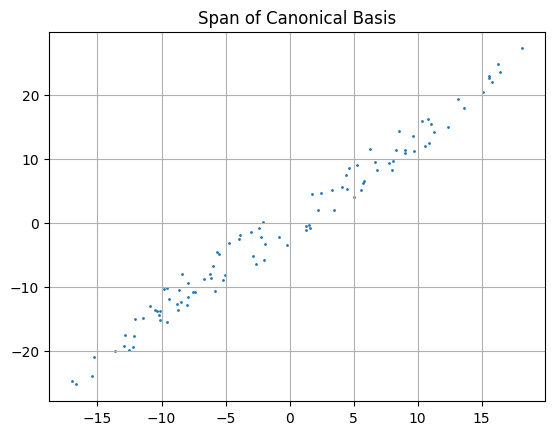

In [18]:
import matplotlib.pyplot as plt

# Define two basis vectors
v1 = np.array([1,2])
v2 = np.array([3,4])

# Generate random coefficients (scalars)
c1 = np.random.uniform(-5, 5, 100)
c2 = np.random.uniform(-5, 5, 100)

# The span is the set of all c1*v1 + c2*v2
# We can compute this utilizing broadcasting
span_points = np.outer(c1, v1) + np.outer(c2, v2)

# Plotting
plt.scatter(span_points[:,0], span_points[:,1], s=1)
plt.title("Span of Canonical Basis")
plt.grid()
plt.show()

### Task 4.1: Linearly Dependent vs Independent

Define two independent vectors: $v_1 and $ $v_2$

Define two dependent vectors: $u_1 and $  $u_2
$ (note $u_2 = 2u_1$).

Generate 500 linear combinations for both sets and plot them on separate subplots.

In [ ]:
# Setup
n_samples = 500
coeffs = np.random.uniform(-10, 10, (2, n_samples))

In [ ]:
# Independent Set
V_indep = np.array([, ]) # Matrix of column vectors [v1 v2]
points_indep = V_indep @ coeffs

# Dependent Set
V_dep = np.array([, ]) # Matrix of column vectors [u1 u2]
points_dep = V_dep @ coeffs

In [ ]:
# TODO: Plotting code
# Create a figure with 1 row and 2 columns.
# Plot points_indep on the left (Should look like a filled plane)
# Plot points_dep on the right (Should look like a single line)

### **4.2: Calculating Rank**


### Task 4.2: Rank Check

Use np.linalg.matrix_rank to confirm the dimensionality of the spaces you just plotted.

In [ ]:
rank_indep = np.linalg.matrix_rank(V_indep)
rank_dep = np.linalg.matrix_rank(V_dep)

print(f"Rank of Independent Set: {rank_indep}") # Expected: 2
print(f"Rank of Dependent Set: {rank_dep}")     # Expected: 1

## **5. Image Manipulation**

- ## Assignment Overview:
You will act as a computer vision engineer. You need to verify how matrix operations affect image geometry.

In [22]:
import cv2
from google.colab.patches import cv2_imshow

### **5.1: Defining Transformations**

The matrix for rotating a vector by $\theta$ degrees is:$$R = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}$$

In [19]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

def get_rotation_matrix(degrees):
    theta = np.radians(degrees)
    c, s = np.cos(theta), np.sin(theta)
    return np.array(((c, -s), (s, c)))

print(get_rotation_matrix(90))

[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]


### Task 5.1: Applying Transformations

Generate a synthetic image (a simple white square on a black background).

Apply a rotation using ndimage.affine_transform.

Note that this function usually expects the inverse mapping (from output pixel back to input pixel) or a specific matrix format.   

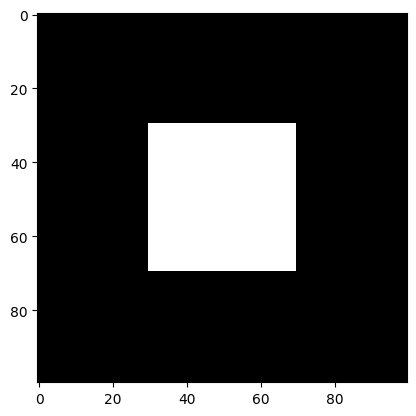

In [27]:
# 1. Create Image
img = np.zeros((100, 100))
img[30:70, 30:70] = 1 # White square

plt.imshow(img, cmap='gray')

In [33]:
# 2. Define Transformation
# Try a Shear transformation: [[1, 0.5], ]
matrix_shear = np.array([1, 0.5])

In [34]:
# 3. Apply
# Note: offset= and order=1 (linear interpolation) are standard
img_sheared = ndimage.affine_transform(img, matrix_shear)

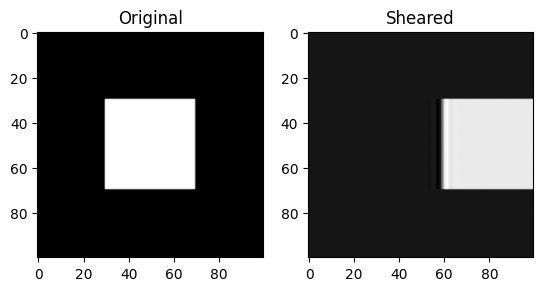

In [37]:
# 4. Visualize
# 'ax' is a numpy array containing two Axes objects
fig, ax = plt.subplots(1, 2)

# Use indexing [0] and [1] to access individual subplots
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original")

ax[1].imshow(img_sheared, cmap='gray')
ax[1].set_title("Sheared")

plt.show()

**Analysis Question:**

*"In the sheared image, did the square shift position?*

*Why or why not?*

*(Hint: Consider the origin $(0,0)$ of the image coordinates)."*

## **6. The Grand Finale**

- ## Assignment Overview:

You will implement a simplified PageRank algorithm to rank 4 webpages.

### Task 5.1: The Random Surfer

- Define an adjacency matrix for 4 pages.

- Page 0 links to 1, 2.

- Page 1 links to 2.

- Page 2 links to 0.

- Page 3 links to 2.

Normalize the columns so they sum to 1 (probabilities).

Run the Power Iteration loop 20 times.

In [38]:
# 1. Adjacency Matrix (Directed)
# Rows = 'To', Cols = 'From'
# Links: 0->1, 0->2 | 1->2 | 2->0 | 3->2
# Note: Page 3 has no outgoing links (Dangling node).
# To prevent probability leak, assume it links to everyone or just itself.
# Let's add a link 3->3 for stability.
A = np.array([, # To Page 0 (from 2)
    , # To Page 1 (from 0)
    , # To Page 2 (from 0, 1, 3)
      # To Page 3 (from 3)
])

SyntaxError: invalid syntax (ipython-input-190487504.py, line 7)

In [ ]:
# 2. Normalize Columns (Make Stochastic)
# Divide each column by the sum of that column
M = A / A.sum(axis=0)
print("Transition Matrix M:\n", M)

In [ ]:
# 3. Power Iteration
r = np.ones(4) / 4 # Initial equal probability
for i in range(20):
    r = M @ r

print("Final Ranks:", r)
# Check: The highest value is the most 'important' page.